In [2]:
import pygmt
import numpy as np
import pandas as pd

In [3]:
path = '/Users/sydneydybing/StrainProject/2024/tohoku_strain_data/'

stas = pd.read_csv(path + 'stations.list', delimiter = '\s+')

stas

<>:3: SyntaxWarning: invalid escape sequence '\s'
<>:3: SyntaxWarning: invalid escape sequence '\s'
/var/folders/yg/s8qp7lfs59g_tbwsx_wxkdx80000gn/T/ipykernel_76087/4121641408.py:3: SyntaxWarning: invalid escape sequence '\s'
  stas = pd.read_csv(path + 'stations.list', delimiter = '\s+')


,Station_name,latitude,longitude,azimuth(S1),azimuth(S2),azimuth(S3),azimuth(S4)
0,KST1,33.5201,135.8363,310,40,85,175
1,HGM1,33.8675,135.7318,337,67,112,202
2,ICU1,33.9001,136.1379,141,231,276,6
3,ANO1,34.7870,136.4019,38,128,173,263
4,SSK1,33.3896,133.3229,355,85,130,220
5,UWA1,33.3859,132.4823,222,312,357,87
6,MUR1,33.2856,134.1563,147,237,282,12
7,MYM1,34.1123,136.1815,237,327,12,102


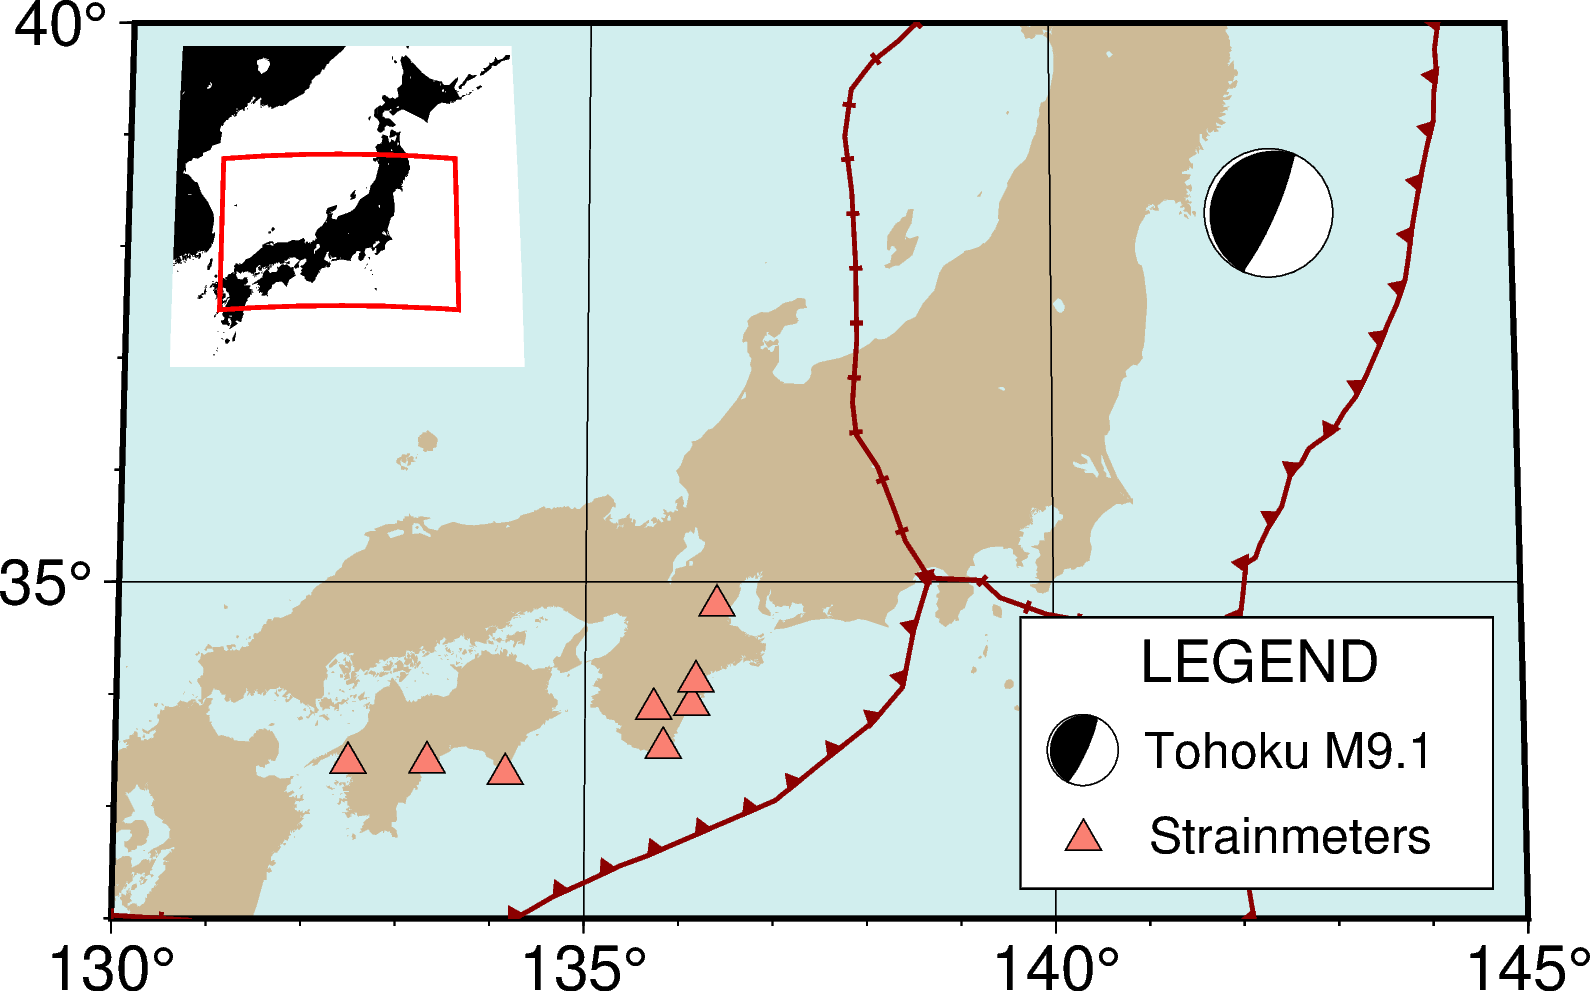

In [90]:
mag_file = '/Users/sydneydybing/StrainProject/2024/tohoku_psmeca_formattedwmag.txt'

circ = False
fm = True

pygmt.config(COLOR_BACKGROUND = 'white')

fig = pygmt.Figure()

region = [130,145,32,40]
fig.coast(region = region, projection = 'N12c', land = 'wheat3', water = 'lightcyan2', frame = 'afg') # Coastline
fig.plot(data = '/Users/sydneydybing/StrainProject/2024/PB2002_boundaries.gmt', pen = '1p,darkred', style = 'f0.25/3p', fill = 'darkred') # Plate boundaries

# Plot earthquakes

if circ:
    fig.plot(x = 142.373, y = 38.297, style = 'c0.7c', fill = 'blue', pen = 'black')
    
# Focal mechanisms

if fm:
    fig.meca(spec = mag_file, convention = 'mt', scale = '0.6c')

# Plot stations 

fig.plot(x = stas.longitude, y = stas.latitude, style = 't0.35c', fill = 'salmon', pen = 'black') # Symbols
# fig.text(x = na_stas.LONG+1, y = na_stas.LAT, text = na_stas.BNUM, font = '6p,black') # Labels

# Make legend

with fig.inset(position = 'jBR+w4c/2.3c+o0.3c/0.25c', box = '+p0.5+gwhite'):
    pass
# fig.plot(x = -131.25, y = 30.5, fill = '#22a785', pen = 'black', style = 'c0.6c')
legend_meca = {'strike': 193, 'dip': 9, 'rake': 78, 'magnitude': 5}
fig.meca(spec = legend_meca, scale = '0.6c', longitude = 140.3, latitude = 33.5, depth = 0)
fig.text(text = ['Tohoku M9.1'], x = 142.5, y = 33.5, font = '12p,black')
fig.plot(x = 140.3, y = 32.7, fill = 'salmon', pen = 'black', style = 't0.35c')
fig.text(text = ['Strainmeters'], x = 142.5, y = 32.75, font = '12p,black')
fig.text(text = ['LEGEND'], x = 142.2, y = 34.3, font = '14p,black')

# Add inset map

with fig.inset(position = 'jTR+o8.5c/0.2c', region = [127, 149, 29, 46], projection = 'N3c'): # jTR means top right point on the map is the anchor, w = width (can add /height), o is dx/dy offset from anchor
    fig.coast(projection = 'N3c', land = 'black', water = 'white')
    rectangle = [[region[0], region[2], region[1], region[3]]]
    fig.plot(data = rectangle, style = 'r+s', pen = '1p,red')

# Show or save 

fig.show();

fig.savefig(path + 'figures/Japan_earthquake_station_map.pdf');